<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone Project: Diabetes risk predictor based on health indicators</h1></div>
<div style="float:left"><h2> Notebook 4: # Modelling - Logistics Regression without Over Sampling</h2></div>
<div style="float:left"><h2> Created by Diego Villanueva</h2></div>
</div>
</div>

This notebook contains code related to a Logistic Regression model that used a training dataset that has not gone through oversampling during the pre-processing phase. 

## Table of contents

4c. Modelling (Logistics Regression)

        4c.1 Load data files

        4c.2 Instantiate and fit baseline logistic regression

        4c.3 Optimising using Pipeline and Grid Search

        4c.4 Fit model with the best params

        4c.5 Model analysis

        4c.6 Model evaluation

        4c.7 Observations

### Imports

In [3]:
# data manipulation
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# PCA
from sklearn.decomposition import PCA

# File saving
import joblib 

# Temporary directories for caching
from tempfile import mkdtemp

# Cross-validation
from sklearn.model_selection import cross_val_score

# Pipeline building
from sklearn.pipeline import Pipeline

# Grid search
from sklearn.model_selection import GridSearchCV

### 4c.1 Load data files

In [25]:
X_rem = joblib.load("../data/Preprocessed_data/X_rem.pkl") # not oversampled or scaled dataset
y_rem = joblib.load("../data/Preprocessed_data/y_rem.pkl") # not oversampled or scaled dataset
X_test = joblib.load("../data/Preprocessed_data/X_test.pkl") # not scaled dataset
y_test = joblib.load("../data/Preprocessed_data/y_test.pkl") #unmodified dataset

### 4c.2 Instantiate and fit baseline logistic regression

In [5]:
# instantiate and fit to scaled & sampled training data
log_reg = LogisticRegression(random_state=1, max_iter=150).fit(X_rem, y_rem)

/Users/diego/anaconda3/envs/diego_capstone/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
# Check the accuracies of 
print(f'Accuracy on remainder set: {log_reg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {log_reg.score(X_test, y_test)}')

Accuracy on remainder set: 0.8485099337748344
Accuracy on test set: 0.8464469673078945


The initial model achieved an accuracy of .77 witht he remainder set and .72 with test set. The following step is to optimise the model by trying different hyperparameters and evaluators.

### 4c.3 Optimising using Pipeline and Grid Search

In [7]:
# Create a directory that will be used to cache the pipeline results
cachedir = mkdtemp()

In [8]:
# Set up a pipeline
# The steps here act as placeholders and will be changed when we pass the pipeline into the grid search later
my_pipeline = Pipeline([('scaler', StandardScaler()), 
                        ('dim_reducer', PCA()), 
                        ('model', LogisticRegression())], memory=cachedir)

In [9]:
# Define range of C values to be tried
c_values = [.0001, .001, .1, 1, 10, 100, 1000]

In [10]:
# Parameter grid
log_reg_param_grid = [

    # l1 without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(penalty='l1', random_state=1, n_jobs=-1, max_iter=10000)],
     'model__C': c_values},
    
    # l1 with PCA
    {'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(penalty='l1', random_state=1, n_jobs=-1, max_iter=10000)],
     'model__C': c_values},
    
    # l2 (default) without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(solver='lbfgs', random_state=1, n_jobs=-1, max_iter=10000)],
     'model__C': c_values},
    
    # l2 (default) with PCA
    {'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(solver='lbfgs', random_state=1, n_jobs=-1, max_iter=10000)],
     'model__C': c_values}
]

In [11]:
# Instantiate the logigstic regression with grid search
logreg_gs = GridSearchCV(my_pipeline, param_grid=log_reg_param_grid, cv=5, n_jobs=-1, verbose=1)

In [12]:
# Fit the logigstic regression with grid search
fitted_logreg_gs = logreg_gs.fit(X_rem, y_rem)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


/Users/diego/anaconda3/envs/diego_capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
560 fits failed out of a total of 1120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
560 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/diego/anaconda3/envs/diego_capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/diego/anaconda3/envs/diego_capstone/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/diego/anaconda3/envs/diego_capstone/lib/python3.8/site-packages/sk

In [13]:
fitted_logreg_gs.best_estimator_

Pipeline(memory='/var/folders/6c/0s0k1hv53xn7g3bpzkggst1r0000gn/T/tmpmacbp0q6',
         steps=[('scaler', StandardScaler()),
                ('dim_reducer', PCA(n_components=0.95)),
                ('model',
                 LogisticRegression(C=0.001, max_iter=10000, n_jobs=-1,
                                    random_state=1))])

The best estimator used a standard scaler, no PCA, and a l2 logistic regression with a C value of 0.001 and max_iter of 10000

In [14]:
# Accuracy of the optimised model:
print("Accuracies of the optimised model:")
print(f"The best logistic regression's accuracy on the remainder set: {fitted_logreg_gs.score(X_rem, y_rem)}")
print(f"The best logistic regression's accuracy on the test set: {fitted_logreg_gs.score(X_test, y_test)}")

Accuracies of the optimised model:
The best logistic regression's accuracy on the remainder set: 0.8489491823219354
The best logistic regression's accuracy on the test set: 0.8463155681698729


We can see overfitting is present in the optiomised model

In [16]:
# Accuracy of the initial/baseline model:
print("Accuracies of the initial/baseline model:")
print(f'Accuracy on remainder set: {log_reg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {log_reg.score(X_test, y_test)}')

Accuracies of the initial/baseline model:
Accuracy on remainder set: 0.8485099337748344
Accuracy on test set: 0.8464469673078945


### 4c.4 Fit model with the best params

In [17]:
# Fit model
optimised_log_reg = LogisticRegression(C=0.001, max_iter=10000, n_jobs=-1, random_state=1).fit(X_rem, y_rem)

### 4c.5 Optimised model analysis

In [18]:
# Accuracy of the optimised model:
print("Accuracies of the optimised model:")
print(f"The best logistic regression's accuracy on the remainder set: {optimised_log_reg.score(X_rem, y_rem)}")
print(f"The best logistic regression's accuracy on the test set: {optimised_log_reg.score(X_test, y_test)}")

Accuracies of the optimised model:
The best logistic regression's accuracy on the remainder set: 0.848267783934766
The best logistic regression's accuracy on the test set: 0.8463155681698729


In [19]:
# Get coefficients and intercept from the optimised model
coefficients = optimised_log_reg.coef_.flatten()  # Flatten the coefficients array
intercept = optimised_log_reg.intercept_

# Get names of columns 
feature_names = X_rem.columns 

# Create dataframe with features and their coefficient values
features_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort rows based on the coefficient value
sorted_features_df = features_df.sort_values(by='Coefficient', ascending=False)

# Display the DataFrame
print(sorted_features_df)

                   Feature  Coefficient
0              Has_high_bp     0.596925
1     Has_high_cholesterol     0.516590
13    General_health_score     0.474323
2      Checked_cholesterol     0.269010
16                 Is_male     0.200301
6        Has_heart_disease     0.179831
17                     Age     0.137992
15      Walking_difficulty     0.079548
5               Had_stroke     0.073834
3                      BMI     0.064526
11      Has_healthcare_cov     0.040967
12    No_attention_bc_cost     0.026397
14  Mental_health_bad_days    -0.002544
4                Is_smoker    -0.007259
7        Physical_activity    -0.034632
9             Eats_veggies    -0.039231
8              Eats_fruits    -0.042905
18               Education    -0.051840
19                  Income    -0.056706
10           Heavy_drinker    -0.252787


In [20]:
# Get the top and bottom coefficients
low_5_coef = sorted_features_df.head(5)
high_5_coef = sorted_features_df.tail(5)

# Join them
combined_coef = pd.concat([low_5_coef, high_5_coef])

# Display results
print("Top 5 coefficients with the lowest values and top 5 with the highest values are:")
print(combined_coef)

Top 5 coefficients with the lowest values and top 5 with the highest values are:
                 Feature  Coefficient
0            Has_high_bp     0.596925
1   Has_high_cholesterol     0.516590
13  General_health_score     0.474323
2    Checked_cholesterol     0.269010
16               Is_male     0.200301
9           Eats_veggies    -0.039231
8            Eats_fruits    -0.042905
18             Education    -0.051840
19                Income    -0.056706
10         Heavy_drinker    -0.252787


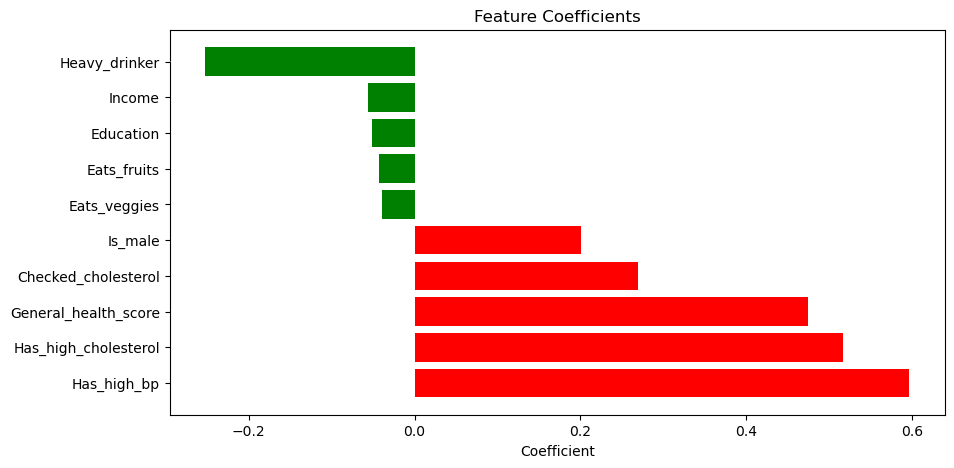

In [21]:
# Create a visualisation:
# Assign colors based on 'Coefficient' values
colors = ['green' if x < 0 else 'red' for x in combined_coef['Coefficient']]

# Create barh plot
plt.figure(figsize=(10, 5))
plt.barh(combined_coef['Feature'], combined_coef['Coefficient'], color=colors)
plt.xlabel('Coefficient')
plt.title('Feature Coefficients')

# Add the values to the bars
for index, value in enumerate(combined_coef['Coefficient']):
    if value < 0:
        plt.text(value, index, f'{value:.2f}', va='center', ha='right', color='white')
    else:
        plt.text(value, index, f'{value:.2f}', va='center', ha='left', color='white')

# Show the plot
plt.show()

### 4c.6 Model Evaluation

In [22]:
# Create confusion matrix for logistic regression

# Get class predictions
y_pred = optimised_log_reg.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Negative Review", "Predicted Positive Review"],
    index=["True Negative Review", "True Positive Review"]
)

display(cf_df)

,Predicted Negative Review,Predicted Positive Review
True Negative Review,62483,1628
True Positive Review,10068,1925


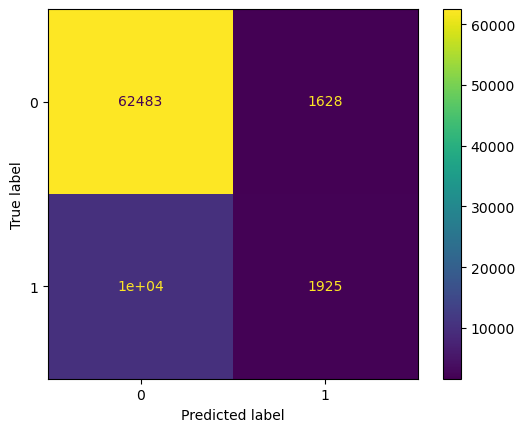

In [23]:
# Create visualisation of confusion matrix
ConfusionMatrixDisplay.from_estimator(optimised_log_reg, X_test, y_test);

Interpretation:

    The results of the confusion matrix are as follows:

    True Negative:  62,483

    False Positive: 1,628

    False Negative: 10,068

    True Positive:  1,925

In [24]:
# Classification Report
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     64111
           1       0.54      0.16      0.25     11993

    accuracy                           0.85     76104
   macro avg       0.70      0.57      0.58     76104
weighted avg       0.81      0.85      0.81     76104



### 4c.7 Observations

Looking at the errors:

For 0: 
- The precision of 0.86 means that 14% of the predicitons as not having diabetes were in fact positive.
- The recall of 0.97 means that 3% of the negative diagnosis were missed by the model as they were classified as being positive

For 1: 
- The precision of 0.54 means that 46% of the predicitons as having diabetes were in fact negative 
- The recall of 0.16 indicates that 84% of the diagnosis that were positive  were missed by the model and were classified as being negative for diabetes



The model shows a very low F1 score of 0.25, indicating that the balance between recall and precision across the various classes could be improved. 

To improve the model's performance, it is recommended to closely examine instances where the sentiment was incorrectly predicted. 

Analysing these examples can help identify if there are specific health indicators that were mistakenly omitted, which could lead to more accurate predictions in the future.